<font size="6"><center>Big data</center></font><center><br>
<font size="5"><center><strong>  Risque empirique er risque de population</strong></center></font>

Le compromis entre complexité des modèles et nombre de données est au centre de la problématique de l'apprentissage statistique. Dans ce TP, nous allons illustrer cette problématique sur un problème jouet de reconnaissance de forme.

Le problème est le suivant: on considère un ensemble $ A \subset[0,1]^{2} $. On suppose que $ X $ est une variable uniforme sur $[0,1]^{2}$ et que la classe $ Y$ de $ X $ est donnée par $ Y = \mathbb{1}_{A}(X)$. On dispose d'un l-échantillon d'apprentissage 
$$
                    ((x_{1},x_{1}), ... , (x_{l},x_{l}))
$$

de loi (X,Y). Il s'agit au vu de cet échantillon de choisir une fonction $ \hat{h} : [0,1]^{2} \longrightarrow \{-1, 1 \} $ pour laquelle la classe Y de X est bien prédite par $ \hat{h}(X)$.

On définit une famille de modèles de  modèles $ (F_{p})_{p \in \mathbb{N}}$ de la façon suivante: pour tout  $ p \in \mathbb{N^{*}} $, on considère le découpage en $p^{2}$ carreaux $(c_{i,j})_{ 1 \leq i,j \leq p }$ de $ [0,1]^{2} $où 

$$
                   c_{ij} = [\frac{i-1}{p}, \frac{i}{p} ] \times [\frac{j-1}{p}, \frac{j}{p} ]
$$

La famille $ F_{p} $ est alors définie comme la famille des classifieurs $ g = \mathbb{1}_{C} $ pour lequel C est constitué d'une réunion finie (éventuellement vide ) de carreaux $c_{ij}$

On définit le risque empirique et le risque de population à l'aide de la fonction de perte $ L(y,y^{'}) = \mathbb{1}_{y \neq y'} $ avec :
$$ \mathbb{1}_{C}:\left\{\begin{array}{l}
1 ~~\mbox{ si C est vraie }  \\ 
0 ~~ \mbox{sinon  } ,
\end{array}\right.
$$

On a donc pour tout $ g \in F_{p}$ 

$$
                  R_{emp}(g) = \frac{1}{l} \sum_{i=1}^l \mathbb{1}_{g(x_{i}) \neq y_{i}}
$$                  

$$
                 R(g)  = E(\mathbb{1}_{g(X) \neq Y})
$$ 

$$
                \hat{R}^{*}_{p} = \min_{g \in F_{p}} R_{emp}(g)
$$

# Expérience 1

Importation des librairies utilisées :

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt

On veut ici implémenter en python le calcul de $\hat{C}_{p} $ et mesurer la différence  entre le $R_{emp}(\mathbb{1}_{\hat{C}_{p}}) $ évalué sur l'échantillon et le risque de population $R(\mathbb{1}_{\hat{C}_{p}}) $

L'ensemble $ A $ de départ est construit comme un ensemble de niveau d'une fonction $ f_{g,s}$ définie par :

$$
     f_{g,s}(x) = \sum_{i=1}^{n} \exp(-\frac{|x - g_{i}|^{2}}{2 s_{i}^{2}})
$$

avec $ g = (g_{i)_{1\leq i \leq n}}$ est une famille de points tirés au hasard uniformément dans le carrée $ [0.2,0.8]^{2} $ et $ s = (s_{i)_{1\leq i \leq n}}$ est une famille de paramètres positifs tirés au hasard uniforméménet dans l'intervalles $[0,a]$. On définit alors:

$$
A = \{ x \in [0,1]^{2} : f_{g,s}(x) \geq \frac{1}{2} \}
$$

Le jeu sur le nombre $n$ de points  et sur la valeur de $ a$  permet de construire des ensembles A de formes variées.

**1 - On écrit une fonction Y = intens(X1,X2,g,s) qui retourne la classe Y des points de $[0,1]^{2}$ dont les deux coordonées sur chacun des axes sont données respectivement par les tableaux X1, X2.**

In [3]:
def intens(X1,X2,g,s):
    I=np.zeros(np.shape(X1))-1
    for i in range(len(X1)):
        fxy=0
        for j in range(len(g)):
            fxy+=np.exp(-((X1[i]-g[j,0])**2+(X2[i]-g[j,1])**2)/(2*s[j]**2))
        if fxy>0.5 :
            I[i]=1
    return I

**2 - On définit une fonction appelée esnalea(n,a,flag) qui retourne un tirage de g et s en fonction de n et a. Si la variable flag vaut 1 alors un affichage grossier de A est effectué.**

In [4]:
def ensalea(n,a,flag=1):
    g=npr.rand(n,2)*(0.8-0.2)+0.2
    s=npr.rand(n)*a
    if flag==1:
        sub=200
        X1,X2 = np.mgrid[0:1:1/sub, 0:1:1/sub]
        Y=intens(np.concatenate(X1),np.concatenate(X2),g,s)
        Y=Y.reshape((sub,sub))
        plt.imshow(Y)
    
    return g,s

**3 - En utilisant la fonction `ensalea`, on génère un ensemble A qu'on utilisera par la suite. On choisit $ n = 4 $ et $ a  = 0.3 $  qui donnent des ensembles A raisonnables.**

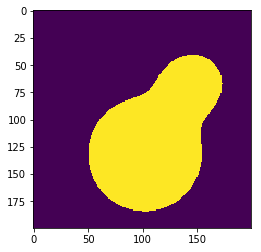

In [5]:
npr.seed(5)

g,s=ensalea(4,0.3,1)

**4- On  construit une fonction nommée $  echant(l,g,s) $ qui retourne une réaisation d'un l-échantillon d'apprentissage $(X_{i}, Y_{i} )$ avec i $\in [1,l]$ et $X_{i} = (X1(i), X2(i))$ et $ Y_{i} = Y(i)$.**

In [8]:
def echant(l,g,s):
    X1=npr.rand(l)
    X2=npr.rand(l)
    Y=intens(X1,X2,g,s)
    return X1,X2,Y

X1,X2,Y=echant(1000,g,s)

**5 -  On construit la fonction $ [B, Re] = estens(X1, X2, Y , p) $ qui pour tout échantillon d'apprentissage $[X1,X2,Y ]$ et toute valeur de $ p \in \mathbb{N^{*}} $ renvoie une matrice B de taille $ p \times p $ et un scalaire Re définis par :
$$
B(i,j) =  1 ~~ si ~~  \hat{l}^{+}_{ij} \geq \hat{l}^{-}_{ij} ~~ et ~~ 0 ~~ sinon.
$$
$$
Re = \hat{R}^{*}_{p} 
$$**

In [9]:
def estens(X1,X2,Y,p):
    B=np.zeros((p,p))
    for i,x in enumerate(X1) :
        y=X2[i]
        B[int(p*x),int(p*y)]+=Y[i]
    B=1*(B>0)
    
    Re=0
    for i,x in enumerate(X1) :
        y=X2[i]
        if B[int(p*x),int(p*y)]!=max(Y[i],0):
            Re+=1
    Re/=len(X1)
    
    return B,Re

In [11]:
B,Re=estens(X1,X2,Y,5)

print(B)
print(Re)

[[0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 1 0]
 [0 1 1 1 0]
 [0 0 1 0 0]]
0.1


**6 - On construit une fonction nommée $testens$ $(B,m,g,s) $ 
qui approximent la valeur de $R(\mathbb{1}_{\hat{C}_{p}}) $ par $R'_{emp}(\mathbb{1}_{\hat{C}_{p}})$ sur un échantillon $(X'_{i}, Y'_{i})$  indépendant de l'échantillon d'apprentissage $(X_{i}, Y_{i})_{1\leq i \leq l}$.**

In [12]:
def testens(B,m,g,s):
    p=np.shape(B)[0]
    
    X1=npr.rand(m)
    X2=npr.rand(m)
    Y=intens(X1,X2,g,s)
    
    R=0
    for i,x in enumerate(X1) :
        y=X2[i]
        if B[int(p*x),int(p*y)]!=max(Y[i],0):
            R+=1
    R/=m
    
    return R

R=testens(B,1000,g,s)
print(R)

0.097


**7- Pour chaque valeur de l, on trace sur le meme graphique les courbes $ p \rightarrow  \hat{R}^{*}_{p}$ et $ p \rightarrow R'_{emp}(\mathbb(1_{\hat{C}_{p}}) $ pour des valeurs de p  entre 2 et 60.**

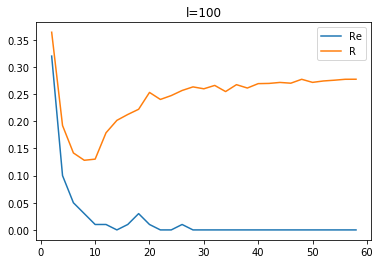

l= 100 ,p_chap minimisant R : 8


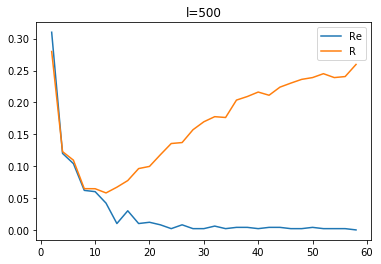

l= 500 ,p_chap minimisant R : 12


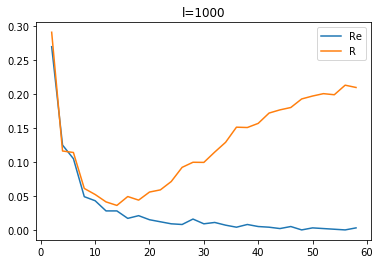

l= 1000 ,p_chap minimisant R : 14


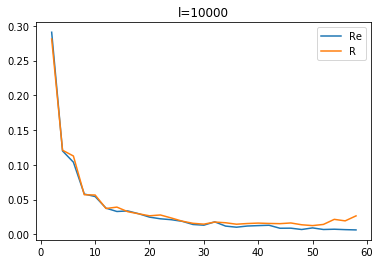

l= 10000 ,p_chap minimisant R : 50


In [20]:
p_list=np.arange(2,60,2)
m=10000 #plus m est grand, plus c'est stable (LGN)

for l in [100,500,1000,10000]:
    Re_list=np.array([])
    R_list=np.array([])
    for p in p_list:
        X1,X2,Y=echant(l,g,s)
        B,Re=estens(X1,X2,Y,p)
        R=testens(B,m,g,s)
        
        Re_list=np.append(Re_list,Re)
        R_list=np.append(R_list,R)
    plt.title("l="+str(l))
    plt.plot(p_list,Re_list,label="Re")
    plt.plot(p_list,R_list,label="R")
    plt.legend()
    plt.show()
    print("l=",l,",p_chap minimisant R :",2*np.argmin(R_list)+2)

Pour l=100, on a $\hat{p}=8$<br>
Pour l=500, on a $\hat{p}=12$<br>
Pour l=1000, on a $\hat{p}=14$<br>
Pour l=10000, on a $\hat{p}=50$<br>

**8- On commente ci-dessous les résultats.**

Pour l fixé et p variant, on voit que le risque empirique tend vers 0 ce qui est normal puisque une subdivision très fine de l'espace permet à ce qu'il y ai souvent au maximum un échantillon par carreaux de la subdivision, ce qui se traduit par une erreur nulle sur l'échantillon d'apprentissage.<br>
Par contre, pour l'échantillon de test, une subdivision très fine de l'espace veut dire que sur les carreaux occupés par les échantillons de test, très peux sont aussi occupés par des échantillons d'apprentissage. Ceci provoque une inconnue et donc une hausse de l'erreur.

On voit que plus l augmente et plus $\hat{p}$ augmente aussi. Ceci est normal puisque pour en revenir à l'explication précédente, plus on aurra d'échantillons d'apprentissage et plus on pourra subdiviser l'espace avant que le nombre trop important d'inconnues sur les carreaux occupés par les échantillon de test augmente l'erreur.

A p fixé, on obtient de meilleurs résultats pour l important puisqu'on a plus d'échantillon d'apprentissage.

Finallement, cette expérience nous permet de voir qu'on doit prendre en compte la taille de l'échantillon d'apprentisage pour choisir la compléxité du modèle. Puisqu'un modèle trop complexe vis à vis de la taille de l'échantillon d'apprentisage laissera beaucoup "d'inconnues" sur un nouvel échantillon de test.